# 1. Importing Data and Libraries:

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [118]:
df = pd.read_excel("/Users/chuningshi/Desktop/absenteeism+at+work/Absenteeism_at_work.xls")
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271219,...,0,1,2,1,0,2,100,170,35,0


# 2. Exploratory Data Analysis (EDA):

In [119]:
# convert numeric data type to factor

df['Reason for absence'] = df['Reason for absence'].astype('category')
df['Month of absence'] = df['Month of absence'].astype('category')
df['Day of the week'] = df['Day of the week'].astype('category')
df['Seasons'] = df['Seasons'].astype('category')
df['Disciplinary failure'] = df['Disciplinary failure'].astype('category')
df['Education'] = df['Education'].astype('category')
df['Social drinker'] = df['Social drinker'].astype('category')
df['Social smoker'] = df['Social smoker'].astype('category')

In [120]:
# see the basic statistics of the data
df.describe()

# how many people the company has?
df.ID.unique().shape

(36,)

<Figure size 1200x800 with 0 Axes>

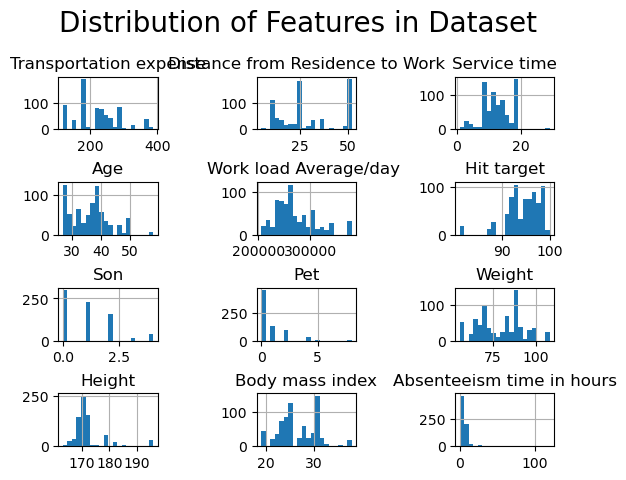

In [121]:
# see the distribution of the continuous variable

plt.figure(figsize=(12, 8))
df.iloc[:, 1:].hist(bins=20)
plt.suptitle('Distribution of Features in Dataset', y=1.02, fontsize=20)
plt.subplots_adjust(hspace=1, wspace=1)
plt.show()

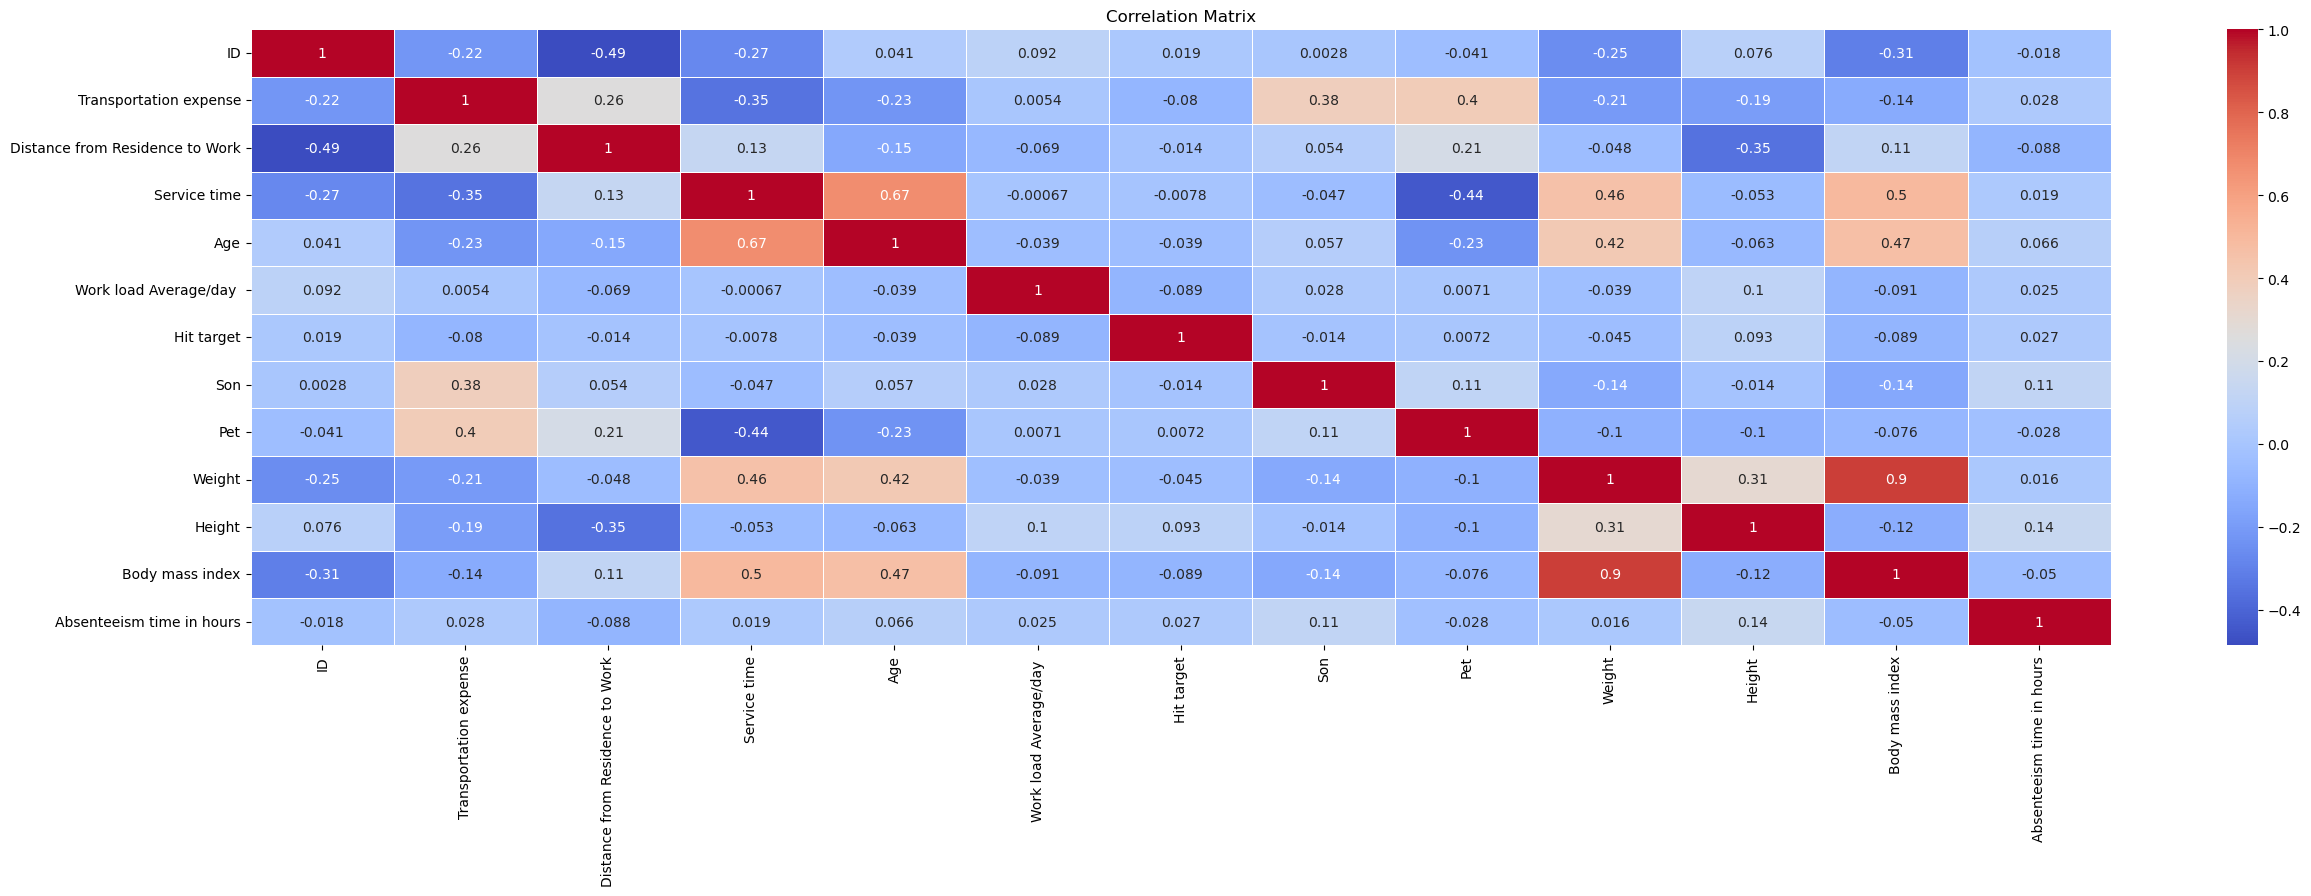

In [122]:
# draw the correlation matrix and see the correlation between variables

corr = df.iloc[:, :].corr()
plt.figure(figsize=(30, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Text(0.5, 1.0, 'Reason for absence')

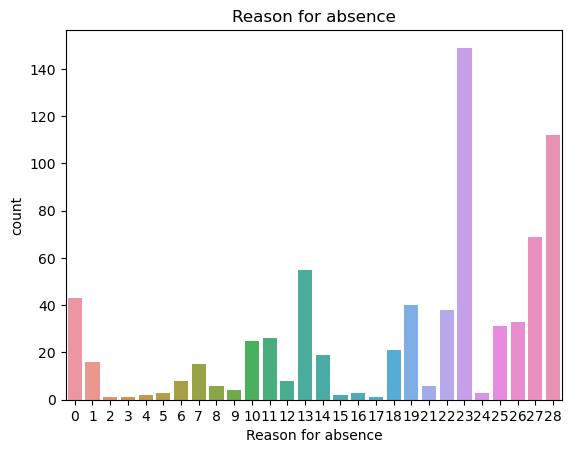

In [123]:
# take a closer look at the distribution of Reason for absence

sns.countplot(x='Reason for absence', data=df)
plt.title('Reason for absence')

The largest proportion of reason for absense is 23 which is medical consultation. The second most is 28 which is dental consultation, and the third most is 27 which is physiotherapy.

# 3. Hypothesis Formulation:

### 1. The first hypothesis is that there is a correlation between the age and the reason for absence

Text(0, 0.5, 'Age')

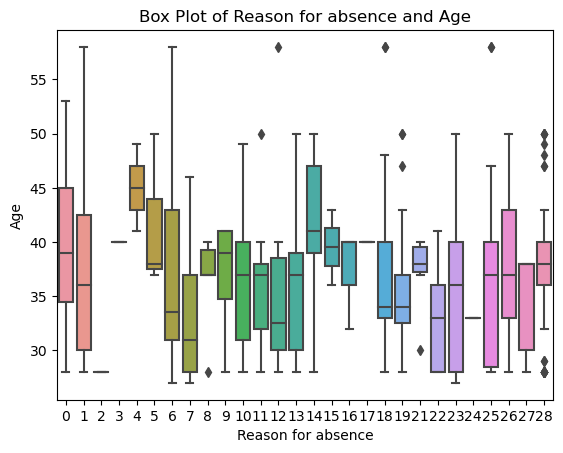

In [124]:
sns.boxplot(x='Reason for absence', y='Age', data=df)
plt.title('Box Plot of Reason for absence and Age')
plt.xlabel('Reason for absence')
plt.ylabel('Age')

From the boxplot we can see that there are some reason for absence have higher mean age than others. For example, reason 4 (Endocrine, nutritional and metabolic diseases)has a mean age around 45, and reason 7 (Diseases of the eye and adnexa)has a lower mean age of around 32. Based on the boxplot, I would say there is a correlation between the age and the reason for absence.

### 2. The second hypothesis is that the absense day of the week follows a uniform distribution

<AxesSubplot:xlabel='Day of the week', ylabel='count'>

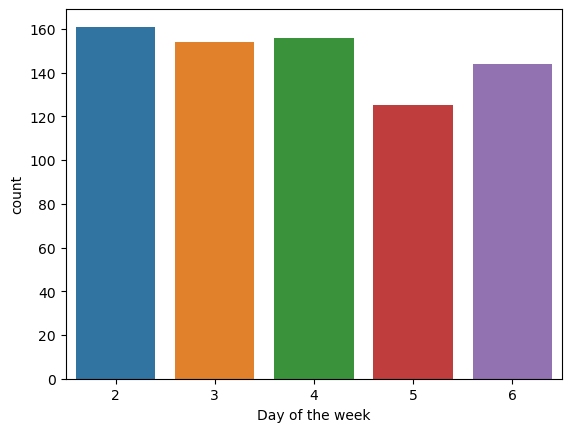

In [125]:
sns.countplot(x='Day of the week', data=df)

Since the count of different day of the week are basically the same, my hypothsis of the absense day of the week follows a uniform distribution is ture.

# 4. statitsical tests:

### To have a deeper understanding of the data, I fitted a linear regression model on the data

In [126]:
import statsmodels.api as sm
import numpy as np

# the response variable is Reason for absence, the predictors are all the other variables
df_new = df.drop(['Reason for absence'], axis=1)
X = sm.add_constant(df_new)
model = sm.OLS(df['Reason for absence'], X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Reason for absence   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     24.54
Date:                Sat, 18 Nov 2023   Prob (F-statistic):           5.42e-68
Time:                        20:19:12   Log-Likelihood:                -2434.8
No. Observations:                 740   AIC:                             4912.
Df Residuals:                     719   BIC:                             5008.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              54.8449     41.162      1.332      0.183     -25.967     135.657
ID                                 -0.0271      0.034     -0.805      0.421      -0.093       0.039
Month of absence                   -0.0997      0.095     -1.046      0.296      -0.287       0.087
Day of the week                     0.4701      0.178      2.635      0.009       0.120       0.820
Seasons                             0.0102      0.261      0.039      0.969      -0.502       0.522
Transportation expense             -0.0137      0.005     -2.771      0.006      -0.023      -0.004
Distance from Residence to Work     0.0198      0.027      0.747      0.455      -0.032       0.072
Service time                       -0.0721      0.109     -0.661      0.509      -0.286       0.142
Age                                -0.0815      0.064     -1.278      0.202      -0.207       0.044
Work load Average/day           -2.207e-05   6.91e-06     -3.197      0.001   -3.56e-05   -8.52e-06
Hit target                         -0.0082      0.078     -0.105      0.916      -0.160       0.144
Disciplinary failure              -20.6803      1.142    -18.109      0.000     -22.922     -18.438
Education                          -0.9571      0.489     -1.958      0.051      -1.917       0.003
Son                                 0.2468      0.261      0.944      0.346      -0.267       0.760
Social drinker                      1.1540      0.814      1.418      0.157      -0.443       2.751
Social smoker                      -0.5695      1.075     -0.530      0.596      -2.679       1.540
Pet                                -0.2866      0.251     -1.140      0.255      -0.780       0.207
Weight                              0.0596      0.256      0.232      0.816      -0.444       0.563
Height                             -0.1300      0.232     -0.560      0.576      -0.586       0.326
Body mass index                    -0.1107      0.742     -0.149      0.881      -1.568       1.347
Absenteeism time in hours          -0.1405      0.019     -7.335      0.000      -0.178      -0.103
==============================================================================
Omnibus:                       99.924   Durbin-Watson:                   1.720
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.722
Skew:                          -1.030   Prob(JB):                     7.53e-31
Kurtosis:                       3.501   Cond. No.                     4.66e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.66e+07. This might indicate that there are
strong multicollinearity or o

To make the model better, I drop some variables that are not significant or have very high correlation with other variables in the model.

In [127]:
df_new = df_new.drop(['ID', 'Seasons', 'Distance from Residence to Work', 'Service time', 'Son', 'Hit target', 'Body mass index'], axis=1)
X = sm.add_constant(df_new)
model = sm.OLS(df['Reason for absence'], X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Reason for absence   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     37.84
Date:                Sat, 18 Nov 2023   Prob (F-statistic):           8.52e-73
Time:                        20:19:13   Log-Likelihood:                -2435.9
No. Observations:                 740   AIC:                             4900.
Df Residuals:                     726   BIC:                             4964.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        51.9049      8.352      6.214      0.000      35.507      68.302
Month of absence             -0.0986      0.073     -1.354      0.176      -0.241       0.044
Day of the week               0.4838      0.175      2.768      0.006       0.141       0.827
Transportation expense       -0.0110      0.004     -2.513      0.012      -0.020      -0.002
Age                          -0.1188      0.046     -2.563      0.011      -0.210      -0.028
Work load Average/day     -2.255e-05   6.41e-06     -3.518      0.000   -3.51e-05   -9.96e-06
Disciplinary failure        -20.6884      1.111    -18.616      0.000     -22.870     -18.507
Education                    -0.8811      0.426     -2.071      0.039      -1.717      -0.046
Social drinker                1.7742      0.612      2.900      0.004       0.573       2.975
Social smoker                -0.4564      1.005     -0.454      0.650      -2.430       1.517
Pet                          -0.1773      0.211     -0.842      0.400      -0.591       0.236
Weight                        0.0198      0.025      0.782      0.434      -0.030       0.070
Height                       -0.1177      0.047     -2.482      0.013      -0.211      -0.025
Absenteeism time in hours    -0.1387      0.019     -7.339      0.000      -0.176      -0.102
==============================================================================
Omnibus:                       99.528   Durbin-Watson:                   1.737
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.086
Skew:                          -1.032   Prob(JB):                     1.04e-30
Kurtosis:                       3.469   Cond. No.                     9.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now most of the predictors in the model are statistically significant as they have a p-value less than 0.05. And we can find something interesting here in the summary: Absenteeism time in hours is a very significant predictor of the reason of absense as the p-value is extremly close to 0 and it also make sense as some type of absense may take longer than others. And whether a person is a social drinker is a much better predictor than whether the person is a social smoker in predicting the the reason of absense. And interestingly, even in the previous section, we draw the distribution plot of the Day of the week which turns out to be uniform distribution, the Day of the week is actually a statistically significant predictor of the reason of absense.